let's model a 2 server queue with 
- A - in series
- B - in parallel

### two in series

In [131]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [114]:
waiting_times = []

In [156]:
class QueueSeries():
    def __init__(self, env):
        self.S1 = []
        self.S2 = []
        self.s1 = simpy.Resource(env)
        self.s2 = simpy.Resource(env)
        self.env = env
        
#         self.start_arrivals = env.process(self.arrivals())
        
    def service(self):
        arrival_time = self.env.now
    #     print("arrival at {}".format(env.now))

        with self.s1.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(7))
#             print("s1 from {} to {}".format(env.now-10,env.now))
        self.S1.append(env.now-arrival_time)

        with self.s2.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(3))
#             print("s2 from {} to {}".format(env.now-10,env.now))

        self.S2.append( env.now - arrival_time)
        
    def arrivals(self):
        while True:
            self.env.process(self.service())
            yield self.env.timeout(np.random.exponential(10))      

(array([134., 390., 232., 119.,  52.,  39.,  23.,   7.,   1.,   3.]),
 array([ 2.65906047,  8.37562545, 14.09219043, 19.80875541, 25.52532039,
        31.24188536, 36.95845034, 42.67501532, 48.3915803 , 54.10814528,
        59.82471025]),
 <BarContainer object of 10 artists>)

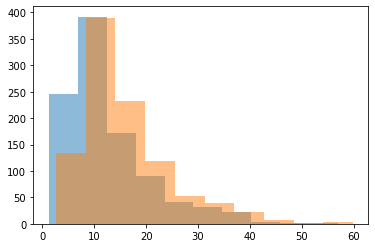

In [157]:
S1_ = []
S2_ = []
for i in range(1000):
    env = simpy.Environment()
    system = QueueSeries(env)
    system.env.process(system.arrivals())
    system.env.run(until=100)

    S1_.append(np.mean(system.S1))
    S2_.append(np.mean(system.S2))
plt.hist(S1_,alpha=0.5)
plt.hist(S2_,alpha=0.5)

# fig, axs = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# axs[0].hist(S1_,bins=20)
# axs[1].hist(S2_,bins=20)

In [275]:
a = [0,0]
a[0]=1
a

[1, 0]

### two in parallel

In [451]:
class QueueParallel():
    def __init__(self, env):
        self.S1 = []
        self.S2 = []
        self.S = [simpy.Resource(env), simpy.Resource(env)]
        self.env = env
        self.available = [True,True]
                
    def service(self,i):
        arrival_time = self.env.now
#         print("{} has arrived at {}".format(i,env.now))
        
        i = 0
#         if np.random.rand()>0.5: i = 1
        if len(self.S[0].queue)>len(self.S[1].queue):
            i = 1
        
        
        with self.S[i].request() as req:
            yield req
            
            if i == 0: 
                self.S1.append( env.now - arrival_time)
                yield self.env.timeout(np.random.exponential(1))
                
            else:
                self.S2.append( env.now - arrival_time)
                yield self.env.timeout(np.random.exponential(3))
                

    def arrivals(self):
        i = 0
        while True:
            self.env.process(self.service(i))
            yield self.env.timeout(np.random.exponential(2)) 
            i+=1
#             print(len(self.s1.queue))
#             yield self.env.timeout(np.random.exponential(10)) 

(array([ 1.,  4.,  8.,  9., 19., 16.,  9.,  7.,  6.,  7.,  5.,  1.,  2.,
         1.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([0.35256781, 0.4751556 , 0.59774338, 0.72033117, 0.84291895,
        0.96550674, 1.08809452, 1.21068231, 1.3332701 , 1.45585788,
        1.57844567, 1.70103345, 1.82362124, 1.94620903, 2.06879681,
        2.1913846 , 2.31397238, 2.43656017, 2.55914796, 2.68173574,
        2.80432353]),
 <BarContainer object of 20 artists>)

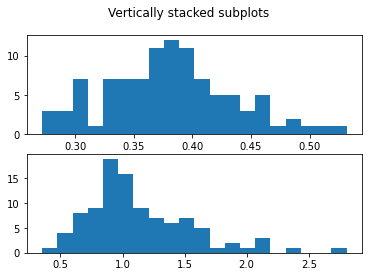

In [453]:
S1_ = []
S2_ = []
for i in range(100):
    env = simpy.Environment()
    system = QueueParallel(env)
    system.env.process(system.arrivals())
    system.env.run(until=1000)

    S1_.append(np.mean(system.S1))
    S2_.append(np.mean(system.S2))
# plt.hist(S1_,alpha=0.5)
# plt.hist(S2_,alpha=0.5)

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].hist(S1_,bins=20)
axs[1].hist(S2_,bins=20)

In [454]:
print(np.mean(S1_), np.mean(S2_))

0.3814523126987845 1.143207952427661
